# Classifying Hand-Written English Alphabets Using Neural Networks

## Importing the Dependencies

We will need Tensorflow, Numpy and Scipy for this Classification

In [1]:
import numpy as np
import tensorflow as tf
from scipy import io as spio

In [2]:
emnist = spio.loadmat("dataset/matlab/emnist-letters.mat")

In [3]:
# load training dataset
x_train = emnist["dataset"][0][0][0][0][0][0]
x_train = x_train.astype(np.float32)

# load training labels
y_train = emnist["dataset"][0][0][0][0][0][1]

In [4]:
# load test dataset
x_test = emnist["dataset"][0][0][1][0][0][0]
x_test = x_test.astype(np.float32)

# load test labels
y_test = emnist["dataset"][0][0][1][0][0][1]

In [5]:
# store labels for visualization
train_labels = y_train
test_labels = y_test

In [6]:
x_train.shape

(124800, 784)

In [7]:
# normalize
x_train /= 255
x_test /= 255

In [8]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
# reshape using matlab order
x_train = x_train.reshape(x_train.shape[0], 784, order="A")
x_test = x_test.reshape(x_test.shape[0], 784, order="A")

In [10]:
x_train.shape

(124800, 784)

In [11]:
y_train.shape

(124800, 1)

In [12]:
y_train = y_train.reshape(y_train.shape[0])

In [15]:
n_values = np.max(y_train) + 1

In [16]:
n_values

27

In [17]:
y_train = np.eye(n_values)[y_train]

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [19]:
y_train.shape

(124800, 27)

TypeError: Invalid dimensions for image data

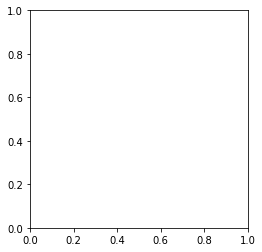

In [74]:
# which sample to look at
samplenum = 12001

import matplotlib.pyplot as plt
%matplotlib inline

img = x_train[samplenum]

# visualize image
plt.imshow(img, cmap='gist_gray')

In [20]:
# show label for sample image
train_labels[samplenum][0]

NameError: name 'samplenum' is not defined

In [21]:
img.max()

NameError: name 'img' is not defined

In [148]:
img.min()

0.0

In [29]:
# PLACEHOLDERS
x = tf.placeholder(tf.float32, shape=[None,784])

In [30]:
# VARIABLES
W = tf.Variable(tf.zeros([784,27]))
b = tf.Variable(tf.zeros([27]))

In [31]:
#CREATE GRAPH OPERATIONS
y = tf.matmul(x,W) + b

In [32]:
# LOSS FUNCTION
y_true = tf.placeholder(tf.float32,[None,27])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [33]:
# OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [34]:
# CREATE SESSION
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for step in range(200):
        
        sess.run(train,feed_dict={x:x_train,y_true:y_train})
    
    #Evaluate
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))

In [109]:
img[0].shape

(28, 28)

In [132]:
xx = x_train[1]

In [133]:
xx.shape

(1, 28, 28)